# Guided Project: Clean And Analyze Employee Exit Surveys

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 

What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. 

However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.

A data dictionary wasn't provided with the dataset. For this project, we'll use our general knowledge to define the columns.



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
dete_survey = pd.read_csv("C:/Users/obalana prosper/Videos/New folder (3)/dete_survey.csv") 
print("dete_survey csv file added successfully")
tafe_survey = pd.read_csv("C:/Users/obalana prosper/Videos/New folder (3)/tafe_survey.csv") 
print("tafe_survey csv file added successfully")

dete_survey csv file added successfully
tafe_survey csv file added successfully


In [19]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [20]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [21]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [22]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [23]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [24]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

### Identify Missing Values and Drop Unnecessary Columns.

The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as `NaN`.

Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.

Each dataframe contains many of the same columns, but the column names are different.

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To start, we'll handle the first two issues. Recall that we can use the pd.read_csv() function to specify values that should be represented as NaN. We'll use this function to fix the missing values first. Then, we'll drop columns we know we don't need for our analysis.


### Instructions

Read the dete_survey.csv CSV file into pandas again, but this time read the Not Stated values in as NaN.

    To read Not Stated in as NaN, set the na_values parameter to Not Stated in the    pd.read_csv() function.
    Assign the result to the variable name dete_survey.

Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.
    
    Use the DataFrame.drop() method to drop the following columns from dete_survey: dete_survey.columns[28:49]. Remember to set the axis parameter equal to 1.

    Assign the result to dete_survey_updated.
    Use the DataFrame.drop() method to drop the following columns from tafe_survey: tafe_survey.columns[17:66]. Remember to set the axis parameter equal to 1.
    Assign the result to tafe_survey_updated.


In [25]:
dete_survey = pd.read_csv("C:/Users/obalana prosper/Videos/New folder (3)/dete_survey.csv", na_values = 'Not Stated') 
print("dete_survey csv file added successfully")

dete_survey csv file added successfully


In [26]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [27]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [28]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### Clean Columns Names

Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

### Instructions

Rename the remaining columns in the dete_survey_updated dataframe.
Use the following criteria to update the column names:
1. Make all the capitalization lowercase.
2. Remove any trailing whitespace from the end of the strings.
3. Replace spaces with underscores ('_').

As an example, Cease Date should be updated to cease_date.
Remember you can use the DataFrame.columns attribute to print an array of the existing column names.

Use the DataFrame.rename() method to update the columns below in tafe_survey_updated. 

Use the DataFrame.head() method to look at the current state of the dete_survey_updated and tafe_survey_updated dataframes and make sure your changes look good.


In [29]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

In [30]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [33]:
mapping = {'Record ID':'id', 
           'CESSATION YEAR': 'cease_date',
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender',
           'CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
          }

In [34]:
tafe_survey_updated = tafe_survey_updated.rename(mapping,axis = 1 )

In [35]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filter the Data

Our end goal is to answer the following question:

1. Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
2. If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.



### Instructions

Use the Series.value_counts() method to review the unique values in the separationtype column in both dete_survey_updated and tafe_survey_updated.

In each of dataframes, select only the data for survey respondents who have a Resignation separation type.
Remember that the dete_survey_updated dataframe contains three Resignation separation types. We want to select all of them.

Use the DataFrame.copy() method on the result to avoid the SettingWithCopy Warning.

Assign the result for dete_survey_updated to dete_resignations.

Assign the reuslt for tafe_survey_updated to tafe_resignations.


In [37]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [38]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [52]:
dete_resign = dete_survey_updated['separationtype'].str.contains('Resignation').copy()

In [53]:
dete_resignations = dete_survey_updated[dete_resign]

In [54]:
dete_resignations.head() 

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [63]:
tafe_survey_updated = tafe_survey_updated.dropna(subset = ['separationtype'])

In [65]:
tafe_survey_updated.isnull().sum()

id                                                       0
Institute                                                0
WorkArea                                                 0
cease_date                                               7
separationtype                                           0
Contributing Factors. Career Move - Public Sector      264
Contributing Factors. Career Move - Private Sector     264
Contributing Factors. Career Move - Self-employment    264
Contributing Factors. Ill Health                       264
Contributing Factors. Maternity/Family                 264
Contributing Factors. Dissatisfaction                  264
Contributing Factors. Job Dissatisfaction              264
Contributing Factors. Interpersonal Conflict           264
Contributing Factors. Study                            264
Contributing Factors. Travel                           264
Contributing Factors. Other                            264
Contributing Factors. NONE                             2

In [110]:
tafe_resign = tafe_survey_updated['separationtype'].str.contains('Resignation').copy()

In [111]:
tafe_resignations = tafe_survey_updated[tafe_resign]

In [112]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [71]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

### Verify Data

#### Instructions

Check the years in each dataframe for logical inconsistencies.

First, clean the cease_date column in dete_resignations.
1. Use the Series.value_counts() method to view the unique values in the cease_date column.
2. Use vectorized string methods to extract the year. As a reminder, here is the full list.
3. Use the Series.astype() method method to convert the type to a float.
4. Use the Series.value_counts() to check the values in the cease_date and dete_start_date columns in dete_resignations and the cease_date column in tafe_resignations.

Because Series.value_counts() returns a series, we can use Series.sort_index() method with ascending= True or False to view the highest and lowest values with their counts.


In [72]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]

C:\Users\obalana prosper\Videos\New folder\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)

C:\Users\obalana prosper\Videos\New folder\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [80]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [113]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [78]:
dete_resignations['cease_date'].sort_index(ascending = False)

821    2013.0
819    2014.0
816    2014.0
815    2014.0
808    2013.0
807    2013.0
806    2013.0
804    2014.0
803    2014.0
802    2013.0
798       NaN
797       NaN
794    2013.0
791       NaN
790    2014.0
789    2014.0
788       NaN
786    2014.0
784    2013.0
774       NaN
771    2014.0
770       NaN
769    2013.0
766    2014.0
762    2006.0
755    2013.0
753    2013.0
752    2013.0
751    2013.0
747    2014.0
        ...  
71     2012.0
69     2012.0
61     2012.0
57     2012.0
55     2012.0
51     2012.0
50     2012.0
48     2012.0
43     2012.0
42     2012.0
41     2012.0
40     2012.0
39     2012.0
37     2012.0
34     2012.0
33     2012.0
27     2012.0
25     2012.0
23     2012.0
22     2012.0
21     2012.0
20     2012.0
16     2012.0
14     2012.0
12     2012.0
11     2012.0
9      2012.0
8      2012.0
5      2012.0
3      2012.0
Name: cease_date, Length: 311, dtype: float64

### Create a new column

#### Instructions

1. Create an institute_service column in dete_resignations
2. Create a new column named institute_service in dete_resignations.
3. Subtract the dete_start_date from the cease_date. Assign the result to a new column named institute_service.


In [84]:
dete_resignations['institute_service'] = dete_resignations['cease_date']- dete_resignations['dete_start_date']

C:\Users\obalana prosper\Videos\New folder\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

### Identify Dissatisfied Employees 
Instructions

Use the Series.value_counts() method to view the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.

Update the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe so that each contains only True, False, or NaN values.

Write a function named update_vals that makes the following changes:
1. If the value is NaN, return np.nan. You can use the following criteria to check that a value is NaN: pd.isnull(val).
2. If the value is '-', return False.
3. For any other value, return True.

Use the DataFrame.applymap() method to apply the function above to the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe.

Remember that we need to pass the update_vals function into the df.applymap() method without parentheses.

Use the df.any() method to create a dissatisfied column in BOTH the tafe_resignations and dete_resignations dataframes.

Use the df.copy() method to create a copy of the results and avoid the SettingWithCopy 

In [114]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [115]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [135]:
import numpy as np
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    else:
        return True

In [137]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis =  1, skipna = False)

C:\Users\obalana prosper\Videos\New folder\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
tafe_resignations_up = tafe_resignations_.copy()

In [141]:
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [143]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [151]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security','work_location', 'employment_conditions','work_life_balance', 'workload' ]].any(axis = 1, skipna = False)

C:\Users\obalana prosper\Videos\New folder\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [152]:
dete_resignations_up = dete_resignations.copy()

In [153]:
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

### Combine Data

#### Instructions

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

Add a column named institute to dete_resignations_up. Each row should contain the value DETE.

Add a column named institute to tafe_resignations_up. Each row should contain the value TAFE.

Combine the dataframes. Assign the result to combined.

Recall that we still have some columns left in the dataframe that we don't need to complete our analysis. Use the DataFrame.dropna() method to drop any columns with less than 500 non null values.

Remember that you can drop columns with less than a certain number of non null values with the thresh parameter.

Assign the result to combined_updated.


In [155]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [156]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up])

C:\Users\obalana prosper\Videos\New folder\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [163]:
combined.isnull().sum().sort_values(ascending = False)

torres_strait                                          651
south_sea                                              648
aboriginal                                             644
disability                                             643
nesb                                                   642
business_unit                                          619
classification                                         490
region                                                 386
role_start_date                                        380
dete_start_date                                        368
role_service                                           361
dissatisfaction_with_the_department                    340
work_location                                          340
employment_conditions                                  340
workload                                               340
job_dissatisfaction                                    340
career_move_to_public_sector                           3

In [164]:
combined_updated = combined.dropna(thresh = 500, axis = 1).copy()

In [165]:
combined_updated.isnull().sum()

age                  55
cease_date           16
dissatisfied          8
employment_status    54
gender               59
id                    0
institute             0
institute_service    88
position             53
separationtype        0
dtype: int64

### Clean the service column 

#### Instructions

First, we'll extract the years of service from each value in the institute_service column.

Use the Series.astype() method to change the type to 'str'.

Use vectorized string methods to extract the years of service from each pattern. You can find the full list of vectorized string methods here.

Double check that you didn't miss extracting any digits.

Use the Series.astype() method to change the type to 'float'.

Next, we'll map each value to one of the career stage definitions above.

Create a function that maps each year value to one of the career stages above.
Remember that you'll have to handle missing values separately. You can use the following code to check if a value is NaN where val is the name of the value: pd.isnull(val).

Use the Series.apply() method to apply the function to the institute_service column. Assign the result to a new column named service_cat.
 

1. New: Less than 3 years at a company
2. Experienced: 3-6 years at a company
3. Established: 7-10 years at a company
4. Veteran: 11 or more years at a company


In [176]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

#### .str.extract(r'(\d+)')
First the, `r'` ' syntax — this is called Raw String Notation, and allows you to use regex without having to escape backslashes.

Next, the actual regex pattern: `(\d+)` — the pair of parentheses are what’s called a capturing group. It indicates to the `.extract()` method that it should pull out the patterns it finds that matches the expression inside the parentheses. 

`\d` is a special character class – it matches any `digit(0-9)` in the string pattern. `+` is what’s called a `quantifier` — it tells our method to find anything that matches 1 or more of the preceding token.

So, when put together, `(\d+)` means that we’re capturing any groups of digit characters in the string. Without the +, we’d still be capturing all the digits, but since \d represents just a single character, we’d be pulling a bunch of single character groups instead.

For example, if I had a string ‘123 456 789’:

(\d+) would match 3 groups: 123, 456, and 789.
(\d) would match 9 groups: 1,2,3,4,5,6,7,8,9

Worth mentioning that `str.extract()` only returns the first match
                       — `str.extractall()` returns all matches

In [179]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')

In [182]:
combined_updated['institute_service'].value_counts(dropna = False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [187]:
def service(val):
    if val < 3:
        return 'New'
    elif  val <=6 and val >= 3:
        return 'Experienced'
    elif val <= 10 and val >= 7:
        return 'Established'
    else:
        return 'Veteran'

In [190]:
combined_updated['service_cat'] =  combined_updated['institute_service'].apply(service)

In [192]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation-Other reasons,Established
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
8,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3.0,Teacher,Resignation-Other reasons,Experienced
9,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
11,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3.0,Teacher,Resignation-Move overseas/interstate,Experienced


## Perform Initial Analysis

#### Instructions

Use the Series.value_counts() method to confirm if the number of True and False in the dissatisfied column. Set the dropna parameter to False to also confirm the number of missing values.

Use the DataFrame.fillna() method to replace the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False.
Use the DataFrame.pivot_table() method to calculate the percentage of dissatisfied employees in each service_cat group.

Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so you can exclude the aggfunc argument.

Use the DataFrame.plot() method to plot the results. Set the kind parameter equal to bar to create a bar chart.


In [193]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [195]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [198]:
combined_plot = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

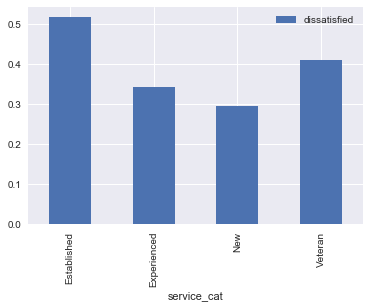

In [199]:
combined_plot.plot(kind = 'bar')